## Gradient Descent

In [1]:
# Implementing the algorithm

import numpy as np
from matplotlib import pyplot as plt

x = 2 * np.random.rand(100, 1) # Creating an array of 100 rows and 1 column
y = 4 + 2 * x + np.random.randn(100, 1) # generating y by adding some random error

Text(0, 0.5, 'Y')

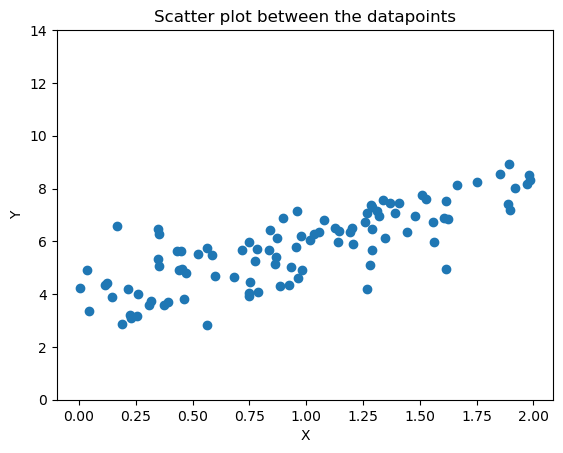

In [2]:
# Plotting the X and y points

plt.scatter(x, y );
plt.ylim([0,14]);
plt.title('Scatter plot between the datapoints')
plt.xlabel('X')
plt.ylabel('Y')

array([[3.64391001],
       [2.23537307]])

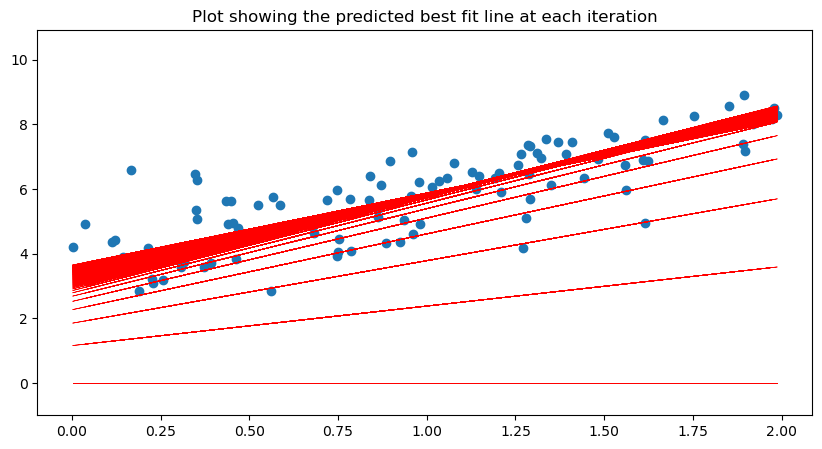

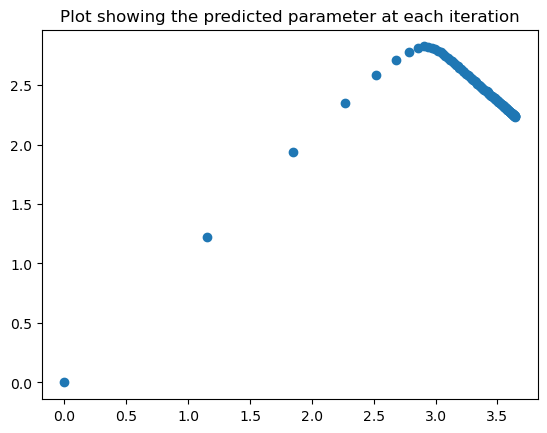

In [3]:
def grad_desc(x, y , eta = 0.1, iter = 100,plots = True , cost_fn_plot =True, verbose = False):
    x = x.flatten().reshape(len(x),1) # converting into n*1 matrix
    y = y.flatten().reshape(len(x), 1) # converting into n*1 matrix
    theta = np.zeros([2,1]) # initializing the theta (0,0)
    theta_new = np.zeros([2,1])
    x_b = np.c_[np.ones((len(x),1)), x] # Creating X matrix of shape n*2
    m = len(x)
    if plots is True:
        plt.figure(figsize = (10,5))
        plt.scatter(x, y)
    for i in range(iter):
        gradients = (2/m) * x_b.T.dot(x_b.dot(theta) - y) # getting gradients into matrix form
        y_pred = x_b.dot(theta) # Making prediction on current value of gradients
        theta = theta - eta * gradients # Correcting theta
        theta_new = np.append(theta_new, theta, axis = 1)
        if verbose is True: # Get the parameter value in each iterations
            print('********'*10)
            print(' Iteration count {} \n parameter {}'.format(0, theta))
        if plots is True: # plotting the Linear line
            plt.plot(x, y_pred, 'r-', linewidth = .5)
            plt.ylim(min(min(y)-2,-1) , max(y)+2)
            plt.title('Plot showing the predicted best fit line at each iteration')
    if cost_fn_plot is True: # Plotting how parameter changes with iteration
        plt.figure()
        plt.scatter(theta_new[0], theta_new[1])
        plt.title('Plot showing the predicted parameter at each iteration')
    return theta

grad_desc(x, y )

## Stotastic Gradient Descent

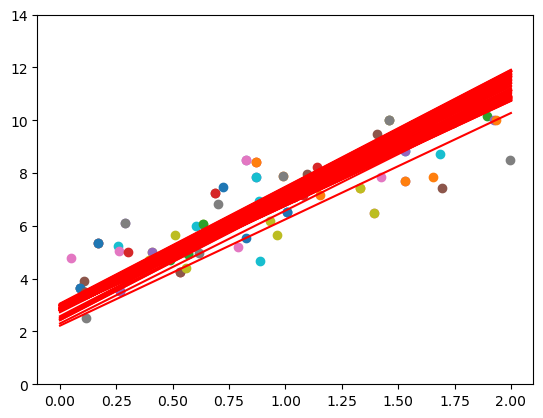

In [4]:
n_epochs = 10
x = 2*np.random.rand(100,1)
y = 4 +3*x + np.random.randn(100, 1)
x_b = np.c_[np.ones((100,1)), x]
m = 100
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(10):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        a = np.array([0, 1,1.5,2])
        y_pred = theta[0] + a * theta[1]
        plt.scatter(xi[0][1], yi )
        plt.plot(a, y_pred, 'r-')
        plt.ylim(0,14)